<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [4]:
import time
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from deep_translator import GoogleTranslator
from scipy import linalg
from ydata_profiling import ProfileReport

привет скучные синтетические данные

In [5]:
try:
    data = pd.read_csv('insurance.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [6]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

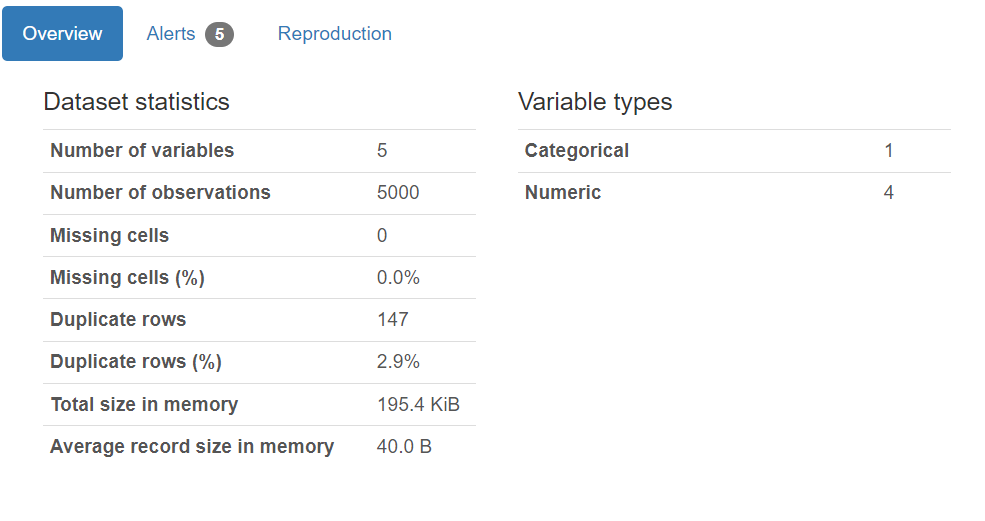

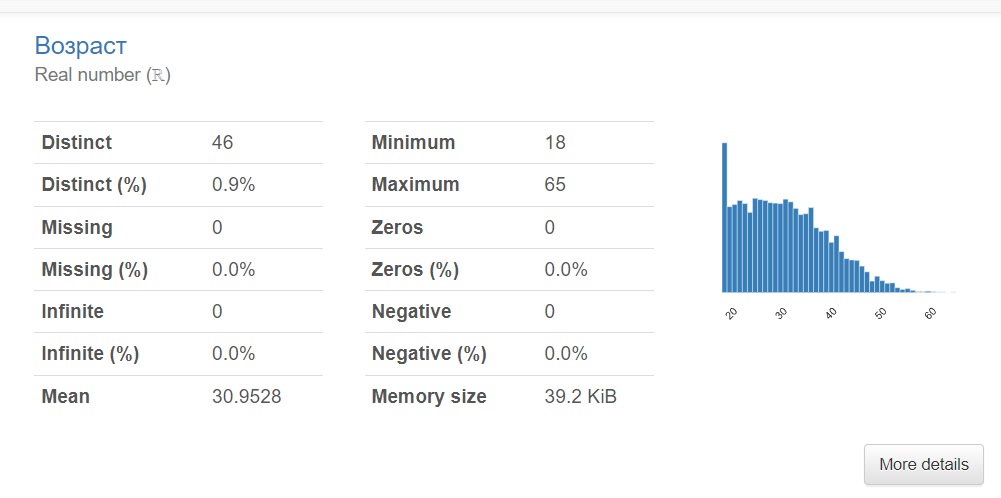

я не знаю в чём проблема зашифровать при помощи STD

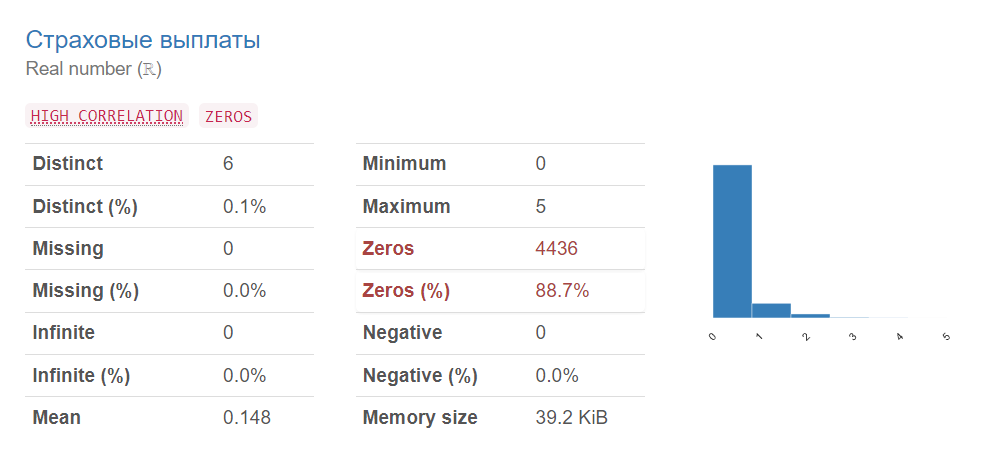

дисбаланс классов очень и очень сильный

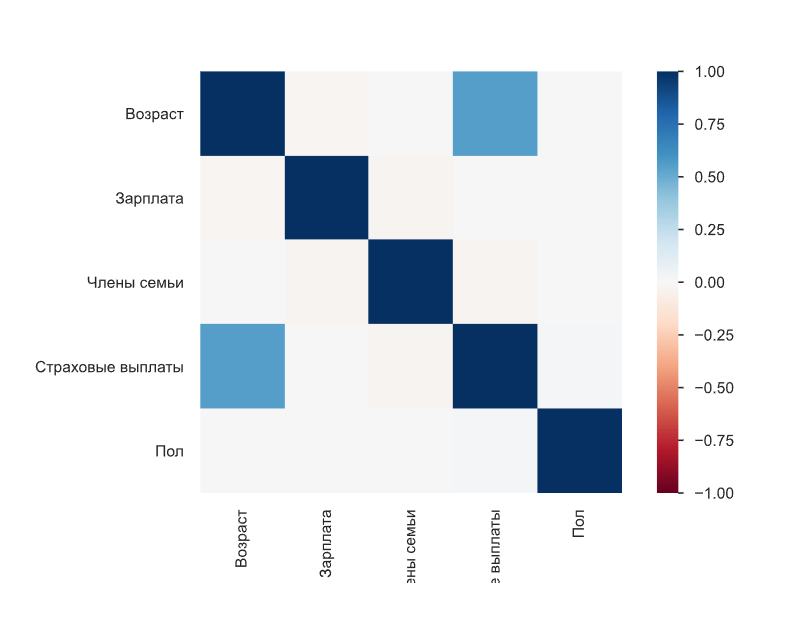

Вывод EDA: 
<br>все столбики имеют тип float 
<br>в столбцах которые будем использовать для построение моделей отсутствуют пропуски
<br>явные дубликаты присутствую в коичестве 147 шт , но сейчас это допустимо
<br>странных значений обнаружено не было
<br>сильные корреляции отсутствуют 

In [7]:
data.columns = data.columns.str.lower()
data.columns

Index(['пол', 'возраст', 'зарплата', 'члены семьи', 'страховые выплаты'], dtype='object')

заменим название столбцов на английский

In [8]:
FTS = []
for item in data.columns:
    FTS.append(GoogleTranslator(source='auto', target='en').translate(item).replace(' ','_'))

In [9]:
data.columns = FTS
data

,gender,age,salary,family_members,insurance_payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


вот теперь спокойно

разбиение , препроцессоринг и обучение

In [10]:
X = data.drop('insurance_payments',axis = 1)
y = data['insurance_payments']

In [11]:
from sklearn import linear_model

In [12]:
preprocessor_ror = ColumnTransformer(transformers =[
    ('std',StandardScaler(), X.select_dtypes(include='number').columns),
    ], remainder ='passthrough'
)

pipe_ror = Pipeline([
    #("prepro", preprocessor_ror),
    ("clf",linear_model.TweedieRegressor(power=1, alpha=0.5, link='log'))
    #("clf",linear_model.LinearRegression())
])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8479)

In [14]:
data['insurance_payments'].unique()

array([0, 1, 2, 3, 5, 4], dtype=int64)

In [15]:
pipe_ror.fit(X_train,y_train)
m0p = pipe_ror.predict(X_test)

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score = r2_score(y_test,m0p)
r2_score

0.761655712507421

ура супер плохо, но как я понял это надо чтобы показать что матрица не влияет

 я так и не понял зачем нам матрицы берёшь делаешь что-то по типу std и всё ... держи хорошо закодированные данные (Участвовал в хакатонах от производства(sibur chalenge) , там использовалось что-то подобное

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** b (не измениться) 

**Обоснование:** <a href = https://translated.turbopages.org/proxy_u/en-ru.ru.c95f28bd-649edc14-50b3abfd-74722d776562/https/math.stackexchange.com/questions/2340563/how-to-prove-that-multiplying-the-equation-ax-b-from-the-left-with-invertibl>подробная статья</a> 
Нам дана матрица A
, умноженная на m timesn
, и вектор-столбец b
, умноженный на m times1
. M
 является обратимой матрицей m timesm
, то множество всех решений для Ax=b
 равно множеству всех решений для MAx=Mb
.m×n
 матрицы A
 и m×1
 вектор-столбец b
. Мы хотим показать, что если M
 является обратимым m×m
 матрица, тогда множество всех решений для Ax=b
 равно множеству всех решений для MAx=Mb
.

Итак, пусть S1={x midAx=b}
 и пусть S2={x∣MAx=Mb}
. S1 подмножествоS2
, а также что S2 подмножествоS1
, что докажет, что S1=S2
.S1={x∣Ax=b}
 и пусть S2={x∣MAx=Mb}
. Мы покажем, что S1⊂S2
 а также что S2⊂S1
, что докажет, что S1=S2
.

Сначала давайте покажем, что $ S_1 \ подмножество S_2 $. S1 подмножествоS2
. Если $ x \ в S_1 $, то $ Ax = b $, поэтому, умножая на $ M $, мы находим, что $ MAx = Mb $. x вS1
, то Ax=b
, поэтому, умножая на M
, мы находим, что MAx=Mb
. Это показывает, что $ x \в S_2 $. x вS2
. Итак, $ S_1 \ подмножество S_2 $.S1 подмножествоS2
.S1⊂S2
. Если x∈S1
, тогда Ax=b
, поэтому умножение на M
 мы находим, что MAx=Mb
. Это показывает, что x∈S2
. Итак, S1⊂S2
.

Далее мы покажем, что $ S_2 \ подмножество S_1 $. S2 подмножествоS1
. Если $ x \в S_2 $, то $MA x = Mb $. x вS2
, то MAx=Mb
. Умножая на $ M ^ {-1} $, мы находим, что $ M ^ {-1} MAx = M ^ {-1} Mb $, что подразумевает, что $ Ax = b $. M−1
, мы находим, что M−1MAx=M−1Mb
, что подразумевает, что Ax=b
. Это показывает, что $ x \ в S_1 $. x вS1
. Итак, $ S_2 \ подмножество S_1 $. S2 подмножествоS1
. Это завершает доказательство того, что $ S_1 = S_2 $.S1=S2
.S2⊂S1
. Если x∈S2
, тогда MAx=Mb
. Умножение на M−1
, мы находим, что M−1MAx=M−1Mb
, из чего следует , что Ax=b
. Это показывает, что x∈S1
. Итак, S2⊂S1
. Это завершает доказательство того, что S1=S2

## Алгоритм преобразования

алгоритм :
<br>fit Составление матрицы и Проверка матрицы на обратимость. 
<br>transform Получение матрицы преобразованных признаков 
<br>inverse_transform Получение обратную преобразованных признаков 
<br>Применение класс на преобразованных признаках 

In [18]:
class Coder:
    def fit(self , X , random_state = None):
        inversible = False
        self.key_matrix_ = np.random.RandomState(random_state).rand(X.shape[1],X.shape[1])
        while inversible == False:
            try:
                self.decode_matrix_ = np.linalg.inv(self.key_matrix_)
                inversible = True
            except np.linalg.LinAlgError:
                self.key_matrix_ = self.key_matrix_ = np.random.RandomState(random_state).rand(X.shape[1],X.shape[1])
    def transform(self,X):
        return X @ self.key_matrix_
    def fit_transform(self , X , random_state = None):
        self.fit(X,random_state)
        return self.transform(X)
    def inverse_transform(self,X):
        return X @ self.decode_matrix_

**Обоснование**

<a href = https://stackoverflow.com/questions/45391733/what-is-the-different-from-pythonnumpy-linalg-pinv-and-scipy-linalg-pinv-or-sci>обоснование почему это корректно использовать без доп заморочек</a> 

## Проверка алгоритма

для начала посмотрим что я имел ввиду по поводу STD

In [19]:
data_exp = data

In [20]:
std = StandardScaler()
std.fit_transform(data_exp)

array([[ 1.002002  ,  1.19043179,  0.97823503, -0.17795659, -0.31955978],
       [-0.998002  ,  1.78285146, -0.19358944, -0.17795659,  1.83962794],
       [-0.998002  , -0.23137543, -1.91091841, -1.09431388, -0.31955978],
       ...,
       [-0.998002  , -1.29773084, -0.60776878,  0.7384007 , -0.31955978],
       [ 1.002002  , -1.06076297, -0.728992  ,  1.654758  , -0.31955978],
       [ 1.002002  , -0.34985936,  0.06906087, -0.17795659, -0.31955978]])

и вот не восстановишь данные без знания дисперссии и среднего)) да и в любом случае это не имеет смысла без других данных по типу ФИО и то их при помощи токенов можно не плохо так зашифровать 

ну ладно , давайте матрицы 

с небольшим багом , но обратима и работает)

In [21]:
coder = Coder()
tr_data = coder.fit_transform(data[X.columns])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(tr_data, y, test_size=0.2, random_state=8479)

In [23]:
preprocessor_ror = ColumnTransformer(transformers =[
    ('std',StandardScaler(), X.select_dtypes(include='number').columns),
    ], remainder ='passthrough'
)

pipe_ror = Pipeline([
    #("prepro", preprocessor_ror),
    ("clf",linear_model.TweedieRegressor(power=1, alpha=0.5, link='log'))
])

In [24]:
pipe_ror.fit(X_train,y_train)
m0p = pipe_ror.predict(X_test)

C:\ana\lib\site-packages\sklearn\linear_model\_glm\glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score = r2_score(y_test,m0p)
r2_score

0.7486878900699081

In [27]:
coder.inverse_transform(tr_data)

,0,1,2,3
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-1.115958e-11,46.0,38000.0,1.000000e+00
2,-3.873385e-12,29.0,21000.0,-2.221858e-12
3,-1.748882e-11,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-2.432417e-12
...,...,...,...,...
4995,-6.193709e-12,28.0,35700.0,2.000000e+00
4996,-1.650633e-11,34.0,52400.0,1.000000e+00
4997,1.375906e-12,20.0,33900.0,2.000000e+00
4998,1.000000e+00,22.0,32700.0,3.000000e+00


вывод:
основная информация с которой мы работали это столбцы 'gender', 'age', 'salary', 'family_members', ('insurance_payments' целевые переменные)
итог эксперементов с моделями:r2 - 0.75 модель работает
также написали класс Coder